In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# 데이터 불러오기
# sklearn은 주로 딕셔너리 타입으로 데이터 정리
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data.keys()
# data : 문제데이터
# target : 정답데이터(숫자 - 0,1)
# target_names : 정답(문자, 0과 1이 무엇인지)
# DESCR : 데이터 설명
# feature_names : 특성 이름

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# malignant : 양성 , 0
# benign : 음성 , 1
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# 특성 이름
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# 데이터에 대한 전반적인 설명
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# 데이터를 보고 유방암을 예측해보자
# 딥러닝 코드 숙지하기 ★

In [8]:
# X, y 데이터 분리
X = data['data']
y = data['target']

In [9]:
pd.Series(y).value_counts()

,count
1,357
0,212


In [10]:
# train과 test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                    random_state = 7,
                                                    stratify = y)
# stratify : train과 test를 분리할때 정답의 비율을 유지 > 한쪽으로 쏠리지 않게 한다.

In [11]:
# 이진분류 문제
# 문제데이터 특성의 숫자 : 30개
X_train.shape

(398, 30)

In [15]:
# 딥러닝 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential() # 딥러닝 모델 토대

# 딥러닝 세부설정
# units : 퍼셉트론이 입력 데이터를 받아들일 가중치의 갯수 / 생각할 수 있는 가짓수
# input_dim : 입력층에서 사용, 입력 데이터 특성의 수
# activation : 다음 퍼셉트론에 값을 전달하기 전에 정리, 잘 모르겠으면 relu
# 입력층
model.add(Dense(units = 32, input_dim = 30, activation = 'relu'))

# 중간층(은닉층)
# units의 숫는 아무렇게나 적어도 상관은 없지만
# 항아리모양으로 적으면 조금은 효율적이다 32 > 64 > 32 > 16 > 8
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))

# 출력층
# 입력층과 중간층의 분석 결과를 종합
model.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 학습 방법 설정
model.compile(
    loss = 'binary_crossentropy', # 오차 계산 방법
    optimizer = 'adam', # 경사하강법 종류
    metrics = ['accuracy'] # 모델 평가 방법
)

In [18]:
# 모델 학습
h = model.fit(X_train, y_train,
          validation_split = 0.3, # 전체 데이터의 30%를 검증 데이터로 사용
          epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4081 - loss: 11.8018 - val_accuracy: 0.3083 - val_loss: 4.0446
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3475 - loss: 2.7058 - val_accuracy: 0.3083 - val_loss: 0.6556
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5886 - loss: 0.6103 - val_accuracy: 0.7667 - val_loss: 0.6065
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6791 - loss: 0.6508 - val_accuracy: 0.4167 - val_loss: 0.6242
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5156 - loss: 0.5829 - val_accuracy: 0.8250 - val_loss: 0.5391
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8096 - loss: 0.5611 - val_accuracy: 0.8167 - val_loss: 0.5231
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7396 - loss: 0.5331 - val_accuracy: 0.8583 - val_loss: 0.4748
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8513 - loss: 0.4962 - val_accuracy: 0.8000 - val_loss: 0.481

In [20]:
# 100번 동안의 학습 결과가 담겨있음
h.history['val_accuracy']

[0.3083333373069763,
 0.3083333373069763,
 0.7666666507720947,
 0.4166666567325592,
 0.824999988079071,
 0.8166666626930237,
 0.8583333492279053,
 0.800000011920929,
 0.8999999761581421,
 0.9083333611488342,
 0.9166666865348816,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.8666666746139526,
 0.925000011920929,
 0.9333333373069763,
 0.9416666626930237,
 0.9333333373069763,
 0.9333333373069763,
 0.925000011920929,
 0.925000011920929,
 0.9333333373069763,
 0.9333333373069763,
 0.9416666626930237,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.9416666626930237,
 0.925000011920929,
 0.9166666865348816,
 0.925000011920929,
 0.9416666626930237,
 0.925000011920929,
 0.925000011920929,
 0.9333333373069763,
 0.9166666865348816,
 0.9166666865348816,
 0.925000011920929,
 0.9416666626930237,
 0.9416666626930237,
 0.933333

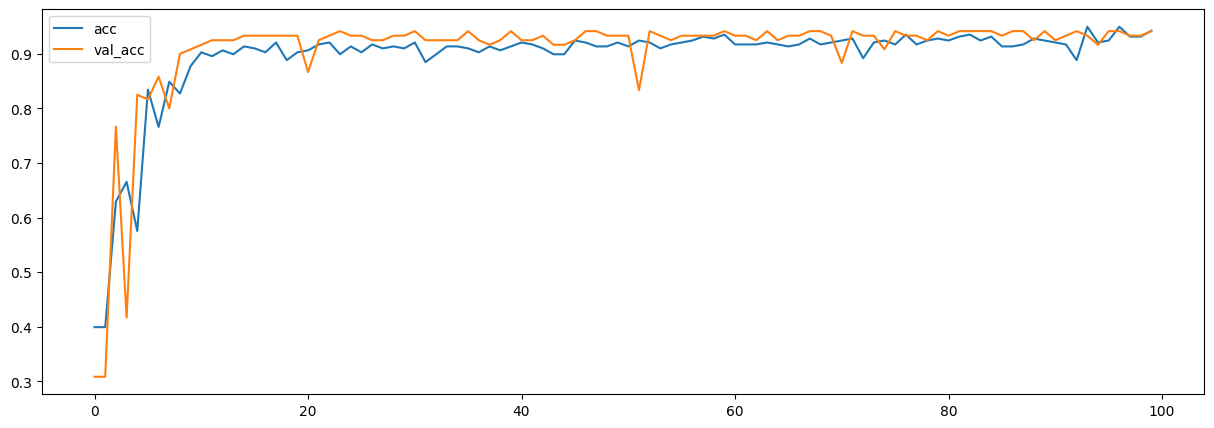

In [21]:
# 시각화
plt.figure(figsize = (15,5)) # 그래프 크기 조절
plt.plot(h.history['accuracy'], label = 'acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
# 학습데이터와 검증데이터 모두 비슷한 값을 가진다 = 모델이 일반화가 잘되었다
# > 학습이 잘되었다